In [1]:
import numpy as np
import matplotlib.pyplot as plt

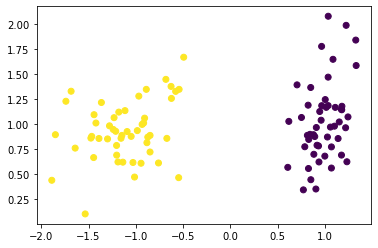

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

In [5]:
def loss_func(x):
    return 0 if x > 0 else 1

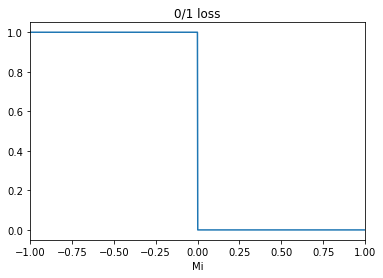

In [6]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

In [7]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [8]:
def exp_func(x):
    return np.exp(-x)

In [9]:
def square_loss(x):
    return (1 - x)**2

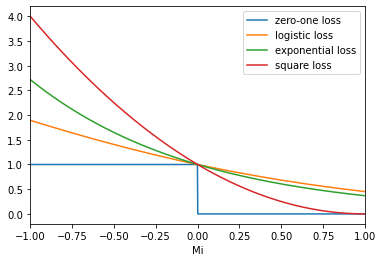

In [10]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

In [11]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [12]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [13]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [14]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [15]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [16]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [17]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [18]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

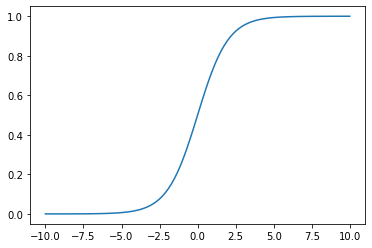

In [21]:
plt.plot(z, p);

In [22]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [23]:
W = logreg_eval_model(X_st, y, iterations=1000, alpha=1e-4)

итерация: 100, logloss: 1.5996538673708376, веса: [-1.76495316  0.08730161 -1.12929916 -0.64272316]
итерация: 200, logloss: 1.5767525572049883, веса: [-1.76108551  0.09900809 -1.1279574  -0.63405146]
итерация: 300, logloss: 1.554036925497323, веса: [-1.75724337  0.11066933 -1.12660468 -0.62541634]
итерация: 400, logloss: 1.5315150976159981, веса: [-1.75342735  0.12228271 -1.12524133 -0.61681915]
итерация: 500, logloss: 1.5091958490387767, веса: [-1.74963809  0.13384536 -1.12386772 -0.60826133]
итерация: 600, logloss: 1.4870886643594083, веса: [-1.74587627  0.14535416 -1.12248429 -0.59974443]
итерация: 700, logloss: 1.465203798107477, веса: [-1.7421426   0.15680564 -1.12109157 -0.59127007]
итерация: 800, logloss: 1.443552336114085, веса: [-1.73843781  0.16819602 -1.11969016 -0.58284002]
итерация: 900, logloss: 1.4221462556853233, веса: [-1.73476267  0.17952116 -1.11828074 -0.57445613]
итерация: 1000, logloss: 1.400998482285436, веса: [-1.731118    0.19077649 -1.11686409 -0.56612042]


Домашнее задание
1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [24]:
def calc_logloss_mod(y, y_pred):
    err = - np.mean(y*np.log(y_pred + 1e-16) + (1.0 - y)*np.log(1.0 - y_pred + 1e-16))
    return np.sum(err)

In [25]:
print(f'Check with zeros: {calc_logloss_mod(np.array([0, 0]), np.array([0.0, 0.0]))}')
print(f'calc_logloss: {calc_logloss(y1, y_pred1)}, calc_logloss_mod: {calc_logloss_mod(y1, y_pred1)}')

Check with zeros: 0.0
calc_logloss: 0.10536051565782628, calc_logloss_mod: 0.10536051565782616


Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [26]:
def logreg_eval_model_mod(X, y, iterations, alpha=1e-4, verbose=False):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if verbose:
            if i % (iterations/10) == 0 :
                print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W, err

In [27]:
def optimize(func, X, y, iter_list, alpha_list):
    d = {}
    for iteration in iter_list:
        for alpha in alpha_list:
            W, err = func(X, y, iterations=iteration, alpha=alpha)
            d[(iteration, alpha)] = err
    result = sorted(d.items(), key=lambda x: x[1])[0]
    best_iter, best_alpha = result[0]
    best_err = result[1]
    return best_iter, best_alpha, best_err

In [28]:
best_iter, best_alpha, best_err = optimize(logreg_eval_model_mod, X_st, y, np.arange(100, 2001, 100), np.array([0.0001, 0.001, 0.01, 0.1]))

print(f'best # of iterations: {best_iter}, best alpha: {best_alpha}, log_loss: {best_err}')

best # of iterations: 2000, best alpha: 0.1, log_loss: 0.34155116952922404


Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [29]:
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred_proba

In [30]:
W, err = logreg_eval_model_mod(X_st, y, iterations=best_iter, alpha=best_alpha)

y_pred_proba = calc_pred_proba(W, X_st)

print(y_pred_proba)

[0.26137035 0.23588202 0.9262041  0.24840739 0.73099165 0.45229871
 0.97473073 0.12454195 0.2680134  0.9136569 ]


Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [31]:
def calc_pred(W, X, threshold=0.5):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.array([1 if proba >= threshold else 0 for proba in y_pred_proba], dtype = np.float64)
    return y_pred

In [32]:
W, err = logreg_eval_model_mod(X_st, y, iterations=best_iter, alpha=best_alpha)

y_pred = calc_pred(W, X_st)

print(y_pred)

[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [34]:
def custom_accuracy_score(y, y_pred):
    return np.sum(y == y_pred) / len(y)

def custom_confusion_matrix(y, y_pred):
    tp, fp, fn, tn = 0, 0, 0, 0
    for i, j in zip(y_pred, y):
        if i == 1:
            if j == 1:
                tp += 1
            else:
                fp += 1
        else:
            if j == 1:
                fn += 1
            else:
                tn += 1
    return np.array([[tp, fp], [fn, tn]])
    
def custom_precision_score(y, y_pred):
    cm = custom_confusion_matrix(y, y_pred)
    tp, fp = cm[0]
    return tp / (tp + fp)

def custom_recall_score(y, y_pred):
    cm = custom_confusion_matrix(y, y_pred)
    tp, fp = cm[0]
    fn, tn = cm[1]
    return tp / (tp + fn)

def custom_f1_score(y, y_pred):
    prc = custom_precision_score(y, y_pred)
    rec = custom_recall_score(y, y_pred)
    return 2 * prc * rec / (prc + rec)

In [35]:
W, err = logreg_eval_model_mod(X_st, y, iterations=100, alpha=0.1)

y_pred = calc_pred(W, X_st)

custom_acc = custom_accuracy_score(y, y_pred)
custom_cm = custom_confusion_matrix(y, y_pred)
custom_prc = custom_precision_score(y, y_pred)
custom_rec = custom_recall_score(y, y_pred)
custom_f1 = custom_f1_score(y, y_pred)

sklearn_acc = accuracy_score(y, y_pred)
sklearn_cm = confusion_matrix(y, y_pred)
sklearn_prc = precision_score(y, y_pred)
sklearn_rec = recall_score(y, y_pred)
sklearn_f1 = f1_score(y, y_pred)

print(f'Custom Metrics:\n\
    Accuracy: {custom_acc},\n\
    Confusion Matrix: {custom_cm},\n\
    Precision: {custom_prc},\n\
    Recall: {custom_rec},\n\
    F1: {custom_f1}\n')

print(f'Sklearn Metrics:\n\
    Accuracy: {sklearn_acc},\n\
    Confusion Matrix: {sklearn_cm},\n\
    Precision: {sklearn_prc},\n\
    Recall: {sklearn_rec},\n\
    F1 (sklearn): {sklearn_f1}\n')

Custom Metrics:
    Accuracy: 0.8,
    Confusion Matrix: [[4 1]
 [1 4]],
    Precision: 0.8,
    Recall: 0.8,
    F1: 0.8000000000000002

Sklearn Metrics:
    Accuracy: 0.8,
    Confusion Matrix: [[4 1]
 [1 4]],
    Precision: 0.8,
    Recall: 0.8,
    F1 (sklearn): 0.8000000000000002



Могла ли модель переобучиться? Почему?
Да, модель могла переобучиться. Переобучение могло произойти из-за слишком большого числа итераций алгоритма градиентный спуск, вследствие чего, модель подстоилась под тренировочные данные и может иметь низкую обобщающую способность (более низкий уровень качества / высокую ошибку на новых данных). Для предотвращения переобучения следует разбить данные на train/test (обычно в пропорции: 80/20 или 70/30), а также использовать кросс-валидацию для оценки качества обобщающей способности модели.